- реализовать нейронную сеть или стек из сверток (Concatenate) на сifar10.
- оценить рост точности при увеличении ширины сети (больше ядер), больше нитей.
- оценить рост точности при увеличении глубины сети (больше слоев)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Input
import numpy as np

In [2]:
batch_size = 64

epochs=15
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train/255
X_test = X_test/255

In [3]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [4]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

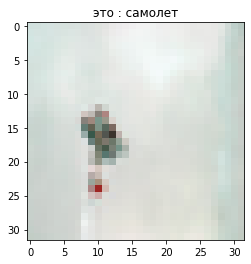

In [5]:
import matplotlib.pyplot as plt
N=313
plt.imshow(X_test[N][:,:,:]) 
plt.title('это : '+classes[np.argmax(y_test[N,:])])
plt.show()
# ну допустим...

Сделаем сеть из двух нитей

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
first_input = Input(shape=(32, 32, 3))
x1 = Conv2D(10, 3, activation='relu', padding='same') (first_input)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Flatten()(x1)
x1 = Dense(100, activation='relu')(x1)
out_x  = Dense(10, activation='softmax')(x1)

model1 = Model(first_input, out_x)

In [16]:
model1.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])


In [17]:
model1.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 11s 4ms/step - loss: 1.4923 - accuracy: 0.4701
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2425 - accuracy: 0.5605
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1508 - accuracy: 0.5954
Epoch 4/15
1563/1563 [==============================] - 5s 4ms/step - loss: 1.0809 - accuracy: 0.6173
Epoch 5/15
1563/1563 [==============================] - 5s 4ms/step - loss: 1.0240 - accuracy: 0.6371
Epoch 6/15
1563/1563 [==============================] - 5s 4ms/step - loss: 0.9716 - accuracy: 0.6580
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9220 - accuracy: 0.6765
Epoch 8/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8761 - accuracy: 0.6932
Epoch 9/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8382 - accuracy: 0.7053
Epoch 10/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.79

In [18]:
model1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2952 - accuracy: 0.6091


[1.2952284812927246, 0.6090999841690063]

In [95]:
import pandas as pd
results = pd.DataFrame()
res={}
res['Model'] = '1 нить, 1 слой'
res['train_loss'] = 0.62
res['train_accuracy'] = 0.78
res['valid_loss'] = 1.29
res['valid_accuracy'] = 0.6

In [96]:
results = results.append(res, ignore_index=True)

In [97]:
results 

,Model,train_accuracy,train_loss,valid_accuracy,valid_loss
0,"1 нить, 1 слой",0.78,0.62,0.6,1.29


Добавим нить

In [34]:
from tensorflow.keras.layers import Concatenate

In [35]:

first_input = Input(shape=(32, 32, 3))
x1 = Conv2D(10, 3, activation='relu', padding='same') (first_input)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Flatten()(x1)

x2 = Conv2D(10, 3, activation='relu', padding='same') (first_input)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Flatten()(x2)
merge = Concatenate()([x1, x2])

x2 = Dense(100, activation='relu')(merge)
out_x  = Dense(10, activation='softmax')(x2)

model2 = Model(first_input, out_x)

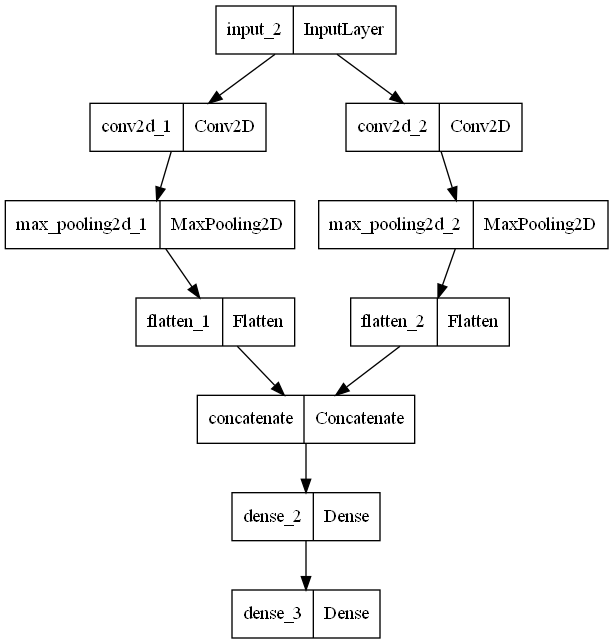

In [36]:
plot_model(model2)

In [38]:
model2.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])


In [39]:
model2.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6395 - accuracy: 0.4128
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2795 - accuracy: 0.5490
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1667 - accuracy: 0.5887
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0871 - accuracy: 0.6188
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0331 - accuracy: 0.6357
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9918 - accuracy: 0.6532
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9504 - accuracy: 0.6658
Epoch 8/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9220 - accuracy: 0.6755
Epoch 9/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8909 - accuracy: 0.6888
Epoch 10/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.865

In [40]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1222 - accuracy: 0.6300


[1.122238039970398, 0.6299999952316284]

In [98]:
res={}
res['Model'] = '2 нити, 1 слой'
res['train_loss'] = 0.77
res['train_accuracy'] = 0.73
res['valid_loss'] = 1.12
res['valid_accuracy'] = 0.62

In [99]:
results = results.append(res, ignore_index=True)
results

,Model,train_accuracy,train_loss,valid_accuracy,valid_loss
0,"1 нить, 1 слой",0.78,0.62,0.60,1.29
1,"2 нити, 1 слой",0.73,0.77,0.62,1.12


Добавим кол-во фильтров для конволюции и кол-во нейронов в полносвязной сети

In [43]:
first_input = Input(shape=(32, 32, 3))
x1 = Conv2D(30, 3, activation='relu', padding='same') (first_input)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Flatten()(x1)

x2 = Conv2D(20, 3, activation='relu', padding='same') (first_input)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Flatten()(x2)
merge = Concatenate()([x1, x2])

x2 = Dense(500, activation='relu')(merge)
out_x  = Dense(10, activation='softmax')(x2)

model3 = Model(first_input, out_x)

In [44]:
model3.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [45]:
model3.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3779 - accuracy: 0.5139
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0417 - accuracy: 0.6315
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8723 - accuracy: 0.6909
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7379 - accuracy: 0.7395
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6043 - accuracy: 0.7858
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4850 - accuracy: 0.8304
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3728 - accuracy: 0.8706
Epoch 8/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2919 - accuracy: 0.9003
Epoch 9/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2227 - accuracy: 0.9249
Epoch 10/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.170

In [46]:
model3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.2871 - accuracy: 0.6395


[2.287137746810913, 0.6395000219345093]

In [100]:
res={}
res['Model'] = '2 нити, 1 слой, больше нейронов'
res['train_loss'] = 0.08
res['train_accuracy'] = 0.97
res['valid_loss'] = 2.28
res['valid_accuracy'] = 0.64

In [101]:
results = results.append(res, ignore_index=True)
results

,Model,train_accuracy,train_loss,valid_accuracy,valid_loss
0,"1 нить, 1 слой",0.78,0.62,0.60,1.29
1,"2 нити, 1 слой",0.73,0.77,0.62,1.12
2,"2 нити, 1 слой, больше нейронов",0.97,0.08,0.64,2.28


Видно, что сеть сильно переобучилась, но и немного подняла метрику на валидации, попробуем увеличить глубину сети. 

In [76]:
first_input = Input(shape=(32, 32, 3))
x1 = Conv2D(32, 3, activation='relu', padding='same')(first_input)
x1 = Conv2D(64, 3, activation='relu', padding='same')(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Conv2D(128, 3, activation='relu', padding='same')(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Flatten()(x1)

x2 = Conv2D(32, 3, activation='relu', padding='same')(first_input)
x2 = Conv2D(64, 3, activation='relu', padding='same')(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Flatten()(x2)
merge = Concatenate()([x1, x2])

x2 = Dense(128, activation='relu')(merge)
x2 = Dense(128, activation='relu')(x2)
out_x  = Dense(10, activation='softmax')(x2)

model4 = Model(first_input, out_x)

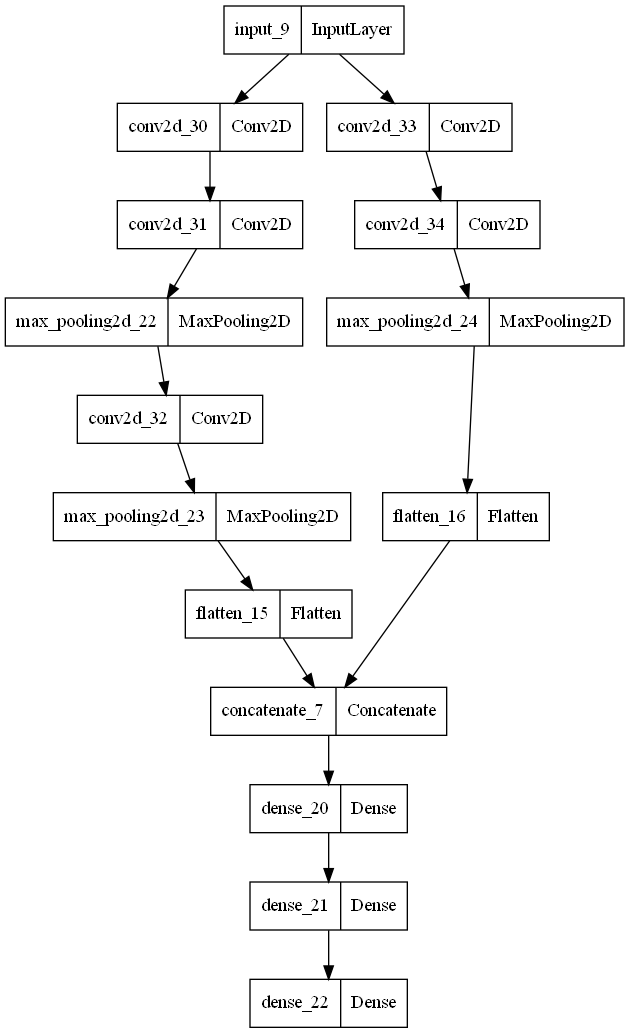

In [77]:
plot_model(model4)

In [78]:
model4.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_30 (Conv2D)             (None, 32, 32, 32)   896         ['input_9[0][0]']                
                                                                                                  
 conv2d_31 (Conv2D)             (None, 32, 32, 64)   18496       ['conv2d_30[0][0]']              
                                                                                                  
 max_pooling2d_22 (MaxPooling2D  (None, 16, 16, 64)  0           ['conv2d_31[0][0]']              
 )                                                                                          

In [79]:
model4.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [80]:
model4.fit(X_train, y_train, epochs=15 )

Epoch 1/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2551 - accuracy: 0.5498
Epoch 2/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8400 - accuracy: 0.7058
Epoch 3/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6421 - accuracy: 0.7735
Epoch 4/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4728 - accuracy: 0.8349
Epoch 5/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3347 - accuracy: 0.8821
Epoch 6/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2290 - accuracy: 0.9187
Epoch 7/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1673 - accuracy: 0.9414
Epoch 8/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1353 - accuracy: 0.9534
Epoch 9/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1139 - accuracy: 0.9613
Epoch 10/15
1563/1563 [==============================] - 12s 8ms/step - l

In [81]:
model4.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.9062 - accuracy: 0.7079


[1.9061810970306396, 0.7078999876976013]

In [102]:
res={}
res['Model'] = '2 нити, 3 слоя, больше нейронов'
res['train_loss'] = 0.07
res['train_accuracy'] = 0.97
res['valid_loss'] = 1.9
res['valid_accuracy'] = 0.70

In [103]:
results = results.append(res, ignore_index=True)

In [104]:
results

,Model,train_accuracy,train_loss,valid_accuracy,valid_loss
0,"1 нить, 1 слой",0.78,0.62,0.60,1.29
1,"2 нити, 1 слой",0.73,0.77,0.62,1.12
2,"2 нити, 1 слой, больше нейронов",0.97,0.08,0.64,2.28
3,"2 нити, 3 слоя, больше нейронов",0.97,0.07,0.70,1.90
